In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
import numpy as np

## Lesson 10 - Bar Charts (Qualitative)

In [266]:
pokemon_df = pd.read_csv('pokemon.csv')
pokemon_df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


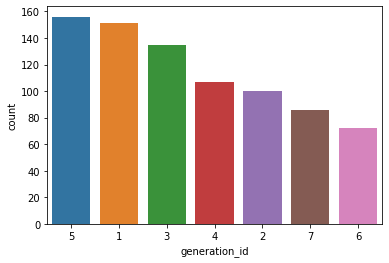

In [275]:
base_color = sb.color_palette()[0]
generation_order = pokemon_df['generation_id'].value_counts().index
sb.countplot(data = pokemon_df, x = 'generation_id', order = generation_order)
#generation_order = pokemon_df['type_1'].value_counts().index
#sb.countplot(data = pokemon_df, y = 'type_1', order = generation_order)



In [ ]:
type_order = pokemon_df['type_1'].value_counts().index
sb.countplot(data = pokemon_df, order = type_order, color = base_color, x = 'type_1')
plt.pyplot.xticks(rotation = 90)

In [ ]:
pokemon_df['type_1'].unique()

## Lesson 11 - Absolute vs Relative Frequency

In [ ]:
#df.melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)
# shi pee thr dataframe yk value ko lo att tha lo pyg lel dr koh br thr ko column name a thit py pee
pkmn_types = pokemon_df.melt(id_vars = ['id', 'species'],
                            value_vars = ['type_1', 'type_2'],
                            var_name = 'type_level', value_name = 'type').dropna()
pkmn_types[802:807]

In [ ]:
# value counts
type_counts = pkmn_types['type'].value_counts()
type_counts[0]

In [ ]:
# Computing the length of longest bar in terms of proportion
n_pokemon = pokemon_df.shape[0] # taking the total number of pokemons by taking the total number of rows in df
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

In [ ]:
# Compute tick prop and tick names
tick_prop = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_prop]

In [ ]:
# type_counts ko index pyn u dr ka max to min sort loke py tl
type_order = type_counts.index

# Changing tick location and labels(Setting Relative Proportiong with percentage)    
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.pyplot.text(count + 2, i, pct_string, va = 'center');  #plt.text(text's_x_position, text's_y_position, text, optional)
    plt.pyplot.xticks(tick_prop * n_pokemon, tick_names)
    plt.pyplot.xlabel('Relative Proportion')


In [ ]:
# count
type_counts2 = pkmn_types['type'].count()
type_counts2

# unique ka value count ko sort ma loke py bu
pkmn_types['type'].unique()


pkmn_types = pd.read_csv('pokemon.csv',
                         usecols = ['id', 'species', 'type_1', 'type_2']
                        ).dropna()


pkmn_types = pkmn_types.melt(id_vars = ['id', 'species'],
                            value_vars = ['type_1', 'type_2'],
                            var_name = 'type_level', value_name = 'type')

In [ ]:
# Changing tick location and labels(Setting Relative Proportiong)
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.pyplot.xticks(tick_prop * n_pokemon, tick_names)
plt.pyplot.xlabel('Relative Proportion')

In [ ]:
x = pokemon_df.isna().sum()
x.index

## Lesson 14 - Pie Charts

(-1.1010649271147273, 1.1037338461314978, -1.101693669869755, 1.10310510337647)

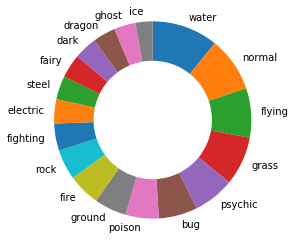

In [269]:
# Work best with two to six slices

type_counts = pkmn_types['type'].value_counts()
#plt.pyplot.pie(type_counts, startangle = 90, counterclock = False, labels = type_counts.index ) # pie chart
plt.pyplot.pie(type_counts, startangle = 90, counterclock = False, labels = type_counts.index,
               wedgeprops = {'width': 0.4}) # donut chart
plt.pyplot.axis('square')

## Lesson 15 - Histograms

In [215]:
pokemon_df = pd.read_csv('pokemon.csv')

pokemon_df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


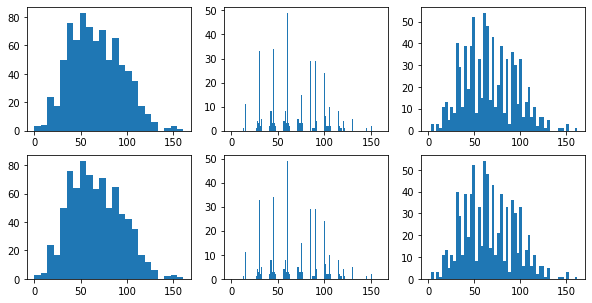

In [251]:
plt.pyplot.figure(figsize = [10, 5])

#Subplot(nrows, ncol, nindeices) 

bins = np.arange(0, pokemon_df['speed'].max() + 7, 7)
plt.pyplot.subplot(2, 3, 1)
plt.pyplot.hist(data = pokemon_df, x = 'speed', bins = bins);


bins = np.arange(0, pokemon_df['speed'].max() + 1/2, 1/2)
plt.pyplot.subplot(2, 3, 2)
plt.pyplot.hist(data = pokemon_df, x = 'speed', bins = bins);


bins = np.arange(0, pokemon_df['speed'].max() + 3, 3)
plt.pyplot.subplot(2, 3, 3)
plt.pyplot.hist(data = pokemon_df, x = 'speed', bins = bins);


bins = np.arange(0, pokemon_df['speed'].max() + 7, 7)
plt.pyplot.subplot(2, 3, 4)
plt.pyplot.hist(data = pokemon_df, x = 'speed', bins = bins);


bins = np.arange(0, pokemon_df['speed'].max() + 1/2, 1/2)
plt.pyplot.subplot(2, 3, 5)
plt.pyplot.hist(data = pokemon_df, x = 'speed', bins = bins);


bins = np.arange(0, pokemon_df['speed'].max() + 3, 3)
plt.pyplot.subplot(2, 3, 6)
plt.pyplot.hist(data = pokemon_df, x = 'speed', bins = bins);


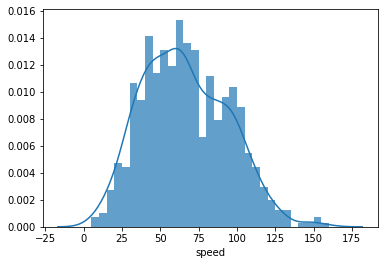

In [265]:
bin_edges = np.arange(0, pokemon_df['speed'].max()+5, 5)
sb.distplot(pokemon_df['speed'], bins = bin_edges, 
            hist_kws = {'alpha' : 0.7})